# CSE5CV - Image Processing
In this lab we will look at using some Python packages for basic image processing.

By the end of this lab, you should be able to:
* Load, display and store images
* Apply basic image processing to images
* Apply basic image transformations to images
* Understand how to call *OpenCV* functions and read *OpenCV* documentation
* Understand how we represent images in our code
* Understand how to use *matplotlib* to visualize images

## Colab preparation

Google Colab is a free online service for editing and running code in notebooks like this one. To get started, follow the steps below:

1. Click the "Copy to Drive" button at the top of the page. This will open a new tab with the title "Copy of...". This is a copy of the lab notebook which is saved in your personal Google Drive. **Continue working in that copy, otherwise you will not be able to save your work**. You may close the original Colab page (the one which displays the "Copy to Drive" button).
2. Run the code cell below to prepare the Colab coding environment by downloading sample files. Note that if you close this notebook and come back to work on it again later, you will need to run this cell again.

In [ ]:
!git clone https://github.com/ltu-cse5cv/cse5cv-labs.git
%cd cse5cv-labs/Lab01

## Packages
Luckily for us, there are packages readily available for us to use that greatly simplify how we can perform image processing operations on new data. This means we can spend more time understanding what an algorithm should do and less time implementing the algorithm.

Given we will be using existing packages, it is very important for us to understand how to interact with them, and how to read their documentation.

In this lab we will be using the following packages:
* *numpy* to represent image data within our code
* *OpenCV* to load/save our images and apply image processing algorithms
* *matplotlib* to display data within our code

In [ ]:
# Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

Below is a brief introduction on three of the main packages we will be interacting with in this Lab.

### OpenCV
OpenCV (Open Source Computer Vision Library) is an open-source library that includes several hundreds of computer vision algorithms.

Package Homepage: https://opencv.org/  
Python Documentation (v4.5.2): https://docs.opencv.org/4.5.2/

<details>
<summary style='cursor:pointer;'><u>More Details</u></summary>

We will be making extensive use of *OpenCV* to help us:  

- Load images
- Modify the colour space of images
- Apply Image Processing algorithms to images
</details>

### Numpy
NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays.

Package Homepage: https://numpy.org/  
Python Documentation (v1.20): https://numpy.org/doc/1.20/

<details>
<summary style='cursor:pointer;'><u>More Details</u></summary>
    
We will be making extensive use of *numpy* throughout all of our labs. Examples of how we will interact with *numpy* include:

- *OpenCV* loads images into *numpy* arrays, likewise it expects *numpy* arrays when applying image processing algorithms
- We almost always use *numpy* arrays to store our image data
- When we introduce Deep Learning in later labs, you'll see that the deep learning package we use interacts directly with *numpy* arrays
</details>

### Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Package Homepage: https://matplotlib.org/  
Python Documentation (latest): https://matplotlib.org/stable/contents.html

<details>
<summary style='cursor:pointer;'><u>More Details</u></summary>

We will be making use of *matplotlib* to visualize data within our code.
</details>

# 1. Working with Images
To get us started, we will load up some image data in Python and visualize it.

Before moving on, make sure you can browse to the *`baboon.png`* and *`baboon_noisy.png`* images and see them in Files tab in the side panel (refer to the screenshot below). You may need to press the "Refresh" button for the files to appear.

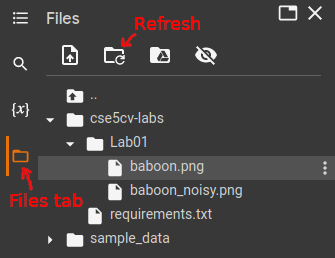

To view the image, you can double click it to open it up in a new tab in your notebook. You should see the below image when opening *`baboon.png`*:

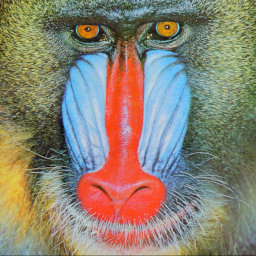

## 1.1 Loading an Image
We will be using *OpenCV* to load our image data. *OpenCV* will load the image data into a *numpy* array.

In [ ]:
baboon_filepath = 'baboon.png'
baboon_image = cv2.imread(baboon_filepath)

## 1.2 Inspecting Image Properties
Before moving on we should look at some properties of the data we are dealing with.  

In [ ]:
print(f'The type of our image is: {type(baboon_image)}')
print('=' * 50)
print(f'The shape of our image is: {baboon_image.shape}')
print(f'The height of our image is: {baboon_image.shape[0]}px')
print(f'The width of our image is: {baboon_image.shape[1]}px')
print(f'The number of channels of our image has is: {baboon_image.shape[2]}')
print('=' * 50)
print(f'The datatype of our loaded image data is: {baboon_image.dtype}')
print('=' * 50)
print(f'The minimum pixel value is: {baboon_image.min()}')
print(f'The minimum pixel value is: {baboon_image.max()}')

<details>
<summary style='cursor:pointer;'><u>Expand for Discussion</u></summary>

The first thing to pay attention to is the *type* of our loaded image. You'll see it has been loaded into a *numpy* ndarray. As mentioned at the start of the lab, we will be using *numpy* to store our image data, and we will see that most of the packages we use operate on *numpy* arrays.

The next thing to pay attention to is information about the *shape* of the loaded image data. In memory, *numpy* represents our image data as a multidimensional array. You'll see that the shape of our image was *(512, 512, 3)*. This shape tells us how many dimensions our data has, and the size of each dimension.  
When thinking about our image data, we know images have a *height*, *width*, and a number of colour *channels* (for RGB this is 3). These directly correspond with the shape and dimensionality of our *numpy* array, where the first dimension *512* corresponds to the *height* of our image, the second dimension *512* corresponds to the *width* of our image, and the last dimension *3* corresponds to the number of colour *channels* in our image.

After the shape information, you'll see the datatype of our *numpy* array is *uint8*. This corresponds to an 8-bit unsigned integer datatype, and means every value within our *numpy* array is an unsigned 8-bit integer. 8-bit unsigned integers can hold whole numbers in the inclusive range: [0, 255].
    
You'll see when we look at the range of values in our *numpy* array that they vary from [0-255]. As expected this falls within our 8-bit unsigned integer range.
</details>

## 1.3 Displaying an Image
Now that our image is loaded, we are going to use *matplotlib* to visualize it.

In [ ]:
# Create a new plot to display our image on. Set the figure size to enlarge the image display
fig, axes = plt.subplots(figsize=(12, 8))

# Add our baboon image to the newly created plot
axes.imshow(baboon_image)

# Display the plot
plt.show()

Did you notice anything strange?

Whilst it may seem we've done something wrong, it turns out that something else is happening behind the scenes that we aren't expecting!

<details>
<summary style='cursor:pointer;'><u>Find Out Why!</u></summary>  

We mentioned before that when loading images with *OpenCV*, they are loaded into *numpy* arrays with the dimensionality: HxWxC, where H = height, W = width and C = channels.
    
We talked about the colour channels and how they represent the Red, Green and Blue (RGB) portions of images, but we didn't talk about how they are handled by our code!
    
When we load images with *OpenCV*, they are loaded into a *numpy* array with channel ordering: BGR (That is, Blue, Green and Red).
    
Typically when we want to do anything with these images (like display them using *matplotlib*), we want the data to have channel ordering RGB (especially for displaying as that is the format *matplotlib* expects!).
    
So what you're seeing is *matplotlib* interpreting the red intensities in the image as blue, and blue intensities as red.
    
To correct this, we will need to change the colour channel ordering of our image from BGR to RGB.
    
In general, remember:
- *OpenCV* loads images with channel ordering BGR
- When displaying images in *matplotlib*, we should give them to *matplotlib* with channel ordering RGB
    
There are a few different ways we can swap from BGR to RGB. We are going to look at the *OpenCV* *`cvtColor()`* function to help us with this conversion!
</details>

## 1.4 Changing Colour Channel Ordering

To change the colour channel ordering from BGR to RGB, we are going to make use of the *OpenCV* *`cvtColor()`* function. You can look at the [*`cvtColor()`* documentation](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) for more information.

In [ ]:
# Change the channel ordering from BGR to RGB
baboon_image_rgb = cv2.cvtColor(baboon_image, cv2.COLOR_BGR2RGB)

# Create a new plot to display our image on. Set the figsize to enlarge the image display
fig, axes = plt.subplots(figsize=(12, 8))

# Add our baboon image to the newly created plot
axes.imshow(baboon_image_rgb)

# Display the plot
plt.show()

Our image is looking much more as we would expect it to!

Not only can *`cvtColor()`* change the colour channel ordering, but it can also change the colour space of our image! You can look at the *OpenCV* documentation to find a list of all possible [colour space conversion codes](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

## 1.5 Writing an Image
Now that we know how to load and display images, let's try writing an image back to disk! We will be using *OpenCV* to help us with this.

In [ ]:
cv2.imwrite('baboon_output.png', baboon_image_rgb)

After running the code, you should see the newly created image file in the left hand panel (click the "Refresh" button). Open that up in Jupyter and check that it looks okay!

...

...

...

<details>
<summary style='cursor:pointer;'><u>Notice anything suspicious?</u></summary>

Once again, we received a blue image!

This is exactly what we ran into before where we loaded the image using *OpenCV* and tried to visualize it with *matplotlib*.  

To appropriately write our image to disk using *OpenCV*, we need to make sure that the colour channels have ordering *BGR*!  
    
</details>

**Task**: Let's try and fix this issue! In the code cell below, convert `baboon_image_rgb` to BGR colour channel ordering, then write it to disk. Open the image in Jupyter to validate it was written appropriately. You should refer to the [colour conversion codes](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) to find which conversion code to use.

In [ ]:
# TODO: Change the colour channel ordering of baboon_image_rgb from RGB to BGR with the OpenCV cvtColor function
# baboon_image_bgr = ...

# TODO: Write baboon_image_bgr to disk


#### Task solution

Click on the hidden cell below to reveal the solution code.

In [ ]:
# TODO: Change the colour channel ordering of baboon_image_rgb from RGB to BGR with the OpenCV cvtColor function
baboon_image_bgr = cv2.cvtColor(baboon_image_rgb, cv2.COLOR_RGB2BGR)

# TODO: Write baboon_image_bgr to disk
cv2.imwrite('baboon_output.png', baboon_image_bgr)

## 1.6 Tasks

### Grayscale Conversion
We have seen how we can change the colour channel ordering of our images from RGB to BGR and vice-versa, however there are a whole range of colour space conversions we can perform using *OpenCV*.

One of the common conversions we may want to perform is from RGB to grayscale. In some of the image processing tasks we want to perform, it is useful to apply the image processing algorithms to a grayscale image.

**Task**: Write a function named *rgb_image_to_grayscale* that:
* Takes an *image* (in a *numpy* array)
* Converts the image from RGB to grayscale (look up the relevant colour conversion code)
* Returns the image

In [ ]:
# TODO: Write your function here



#### Task solution

In [ ]:
def rgb_image_to_grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

Once you've written that function, run the below code cell to test it.  
**NOTE:** The output might not be what you expect. Read on to see why

In [ ]:
baboon_grayscale = rgb_image_to_grayscale(baboon_image_rgb)

print(f'The shape of your grayscale image is: {baboon_grayscale.shape}')

fig, axes = plt.subplots(figsize=(12, 8))
axes.imshow(baboon_grayscale)
plt.show()

You might have found that your image has a green tinge to it. You might also notice from the print statement that your image no longer has 3 colour channels (infact the whole colour channel dimension has been removed). What this means is that per-pixel in your image, there is a single value (from 0-255) representing that pixel intensity.

We know that we want this to be interpreted as levels of gray (from white to black), however *matplotlib* has a whole collection of ways it can represent those colour intensities, and by default, that way is not from black to white. *matplotlib* refers to this as a colormap, and you can read the [colormap documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for more information.

To appropriately show the grayscale image, we need to define the colormap within the call to *`imshow()`*.

**Task**: Appropriately define the colormap within the call to *`imshow()`*
* Read the [*`imshow()`* documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to see what parameters to use to display a grayscale image (Hint: It is within the first few paragraphs of the documentation)
* Complete the *`imshow()`* call with the correct parameters
* Visually verify that your image displays correctly

In [ ]:
baboon_grayscale = rgb_image_to_grayscale(baboon_image_rgb)

fig, axes = plt.subplots(figsize=(12, 8))

# TODO: Fill in the remaining parameters for this call to imshow to correctly display a grayscale image
axes.imshow(baboon_grayscale,

plt.show()

#### Task solution

In [ ]:
baboon_grayscale = rgb_image_to_grayscale(baboon_image_rgb)

fig, axes = plt.subplots(figsize=(12, 8))

axes.imshow(baboon_grayscale, cmap='gray', vmin=0, vmax=255)

plt.show()

### Load Images in RGB
As we've seen so far, it is quite common for us to load image data in *OpenCV* and want it to have an RGB colour channel ordering for other tasks we might want to perform.

**Task**: Write a function named *load_image_rgb* that:
* Takes the *filepath* of an image to load
* Loads the image
* Changes the colour channel ordering to RGB
* Returns the loaded image

At the bottom of the code cell is some code that will load your image and display it. Use this to verify that the image is displayed correctly.

In [ ]:
# TODO Write your function here




# Test your function!
loaded_baboon_image = load_image_rgb('baboon_output.png')

fig, axes = plt.subplots(figsize=(12, 8))
axes.imshow(loaded_baboon_image)
plt.show()

#### Task solution

In [ ]:
def load_image_rgb(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Display Image Function
It will be common for us to want to display images in our code. To save us from continually rewriting the *matplotlib* code, let's write a function to handle displaying an image for us.

**Task**: Write a function named *display_image* that:
* Takes an image (in a *numpy* array)
* Displays the image using *matplotlib*

At the bottom of the code cell is some code that will call your display function. Use this to verify that your image is displayed correctly.

In [ ]:
# TODO Write your function here




# Test your function!
display_image(baboon_image_rgb)

#### Task solution

In [ ]:
def display_image(image):
    fig, axes = plt.subplots(figsize=(12, 8))

    axes.imshow(image)

    plt.show()

Great work! That will make things much simpler for us moving forward.

Before moving on, there is one other modification we should make to greatly improve the usability of our function. You'll notice if we run the below code cell to display the grayscale image, we get the same issue as before (a green tinged image)

In [ ]:
display_image(baboon_grayscale)

**Task**: Update your *display_image* function so that it properly displays both RGB and grayscale images. This means if the image is grayscale, you should apply the corresponding colormap.

Visually verify your function works by checking that the two calls to your function at the bottom of the next code cell look correct.

**HINT:** Whilst there are a number of ways we could go about this, a simple way is to use the fact that a grayscale image will only have 2 dimensions (no colour channel dimension). This means in your code, you should be able to check the number of dimensions of your image and set the colormap accordingly. You can check the number of dimensions a *numpy* array has by accessing the *ndim* property. e.g. ```my_array.ndim```

In [ ]:
# TODO: Copy your display_image function from above
#       Modify it so that it sets the colormap accordingly for greyscale images




# Test your function!
display_image(baboon_image_rgb)
display_image(baboon_grayscale)

#### Task solution

In [ ]:
def display_image(image):
    fig, axes = plt.subplots(figsize=(12, 8))

    if image.ndim == 2:
        axes.imshow(image, cmap='gray', vmin=0, vmax=255)
    else:
        axes.imshow(image)

    plt.show()

### Display Image Pair Function
When we get to the Image Processing tasks, it will be useful for us to display two images side-by-side in the same visualization. To save us some burden later on, let's create a function that can take a pair of images and display them side-by-side. While we are at it, let's also get this to work for both RGB and grayscale images.

**Task**: Write a function named *display_image_pair* that:
* Takes two images as separate parameters (both stored in *numpy* arrays)
* Displays both images in the same plot using *matplotlib*
* Make sure it can handle both RGB and grayscale images

We're going to interact with *`plt.subplots()`* in a different way than we've seen before. To get you on the right track, some of the code has already been implemented for you. Make sure you read the code comments and implement the remaining ***TODO*** sections of the code.

In [ ]:
def display_image_pair(first_image, second_image):
    # When using plt.subplots, we can specify how many plottable regions we want to create through nrows and ncols
    # Here we are creating a subplot with 2 columns and 1 row (i.e. side-by-side axes)
    # When we do this, axes becomes a list of length 2 (Containing both plottable axes)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

    # TODO: Call imshow on each of the axes with the first and second images
    #       Make sure you handle both RGB and grayscale images


    plt.show()


# Test your function!
display_image_pair(baboon_image_rgb, baboon_grayscale)

#### Task solution

In [ ]:
def display_image_pair(first_image, second_image):
    # When using plt.subplots, we can specify how many plottable regions we want to create through nrows and ncols
    # Here we are creating a subplot with 2 columns and 1 row (i.e. side-by-side axes)
    # When we do this, axes becomes a list of length 2 (Containing both plottable axes)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

    # TODO: Call imshow on each of the axes with the first and second images
    #       Make sure you handle both RGB and grayscale images
    if first_image.ndim == 2:
        axes[0].imshow(first_image, cmap='gray', vmin=0, vmax=255)
    else:
        axes[0].imshow(first_image)

    if second_image.ndim == 2:
        axes[1].imshow(second_image, cmap='gray', vmin=0, vmax=255)
    else:
        axes[1].imshow(second_image)

    plt.show()

# 2. Image Processing - Filtering vs Warping

Now we know how to load images, visualize images and write images to disk, let's look at applying some image processing!

There are two main types of image processing: filtering and warping. Filtering modifies each pixel in-place, while warping modifies the boundaries of the image or positions of the pixels. Examples of filtering include: blurring, sharpening and colour balancing. Examples of warping include: resizing, cropping and rotating. The rest of this lab is devoted to exploring these types of operations.

## 2.1 Filtering

When we discuss filtering in image processing, we are talking about producing an output image from an input image, where each pixel is modified in some way. Concretely, each pixel *(x, y)* in the output, is influenced by the neighbourhood of corresponding pixels around *(x, y)* in the input.

To achieve this, we perform a convolution operation, which involves sliding a small array of weights (called a kernel) over an image, where a multiplication and sum operation takes place between overlapping pixels in the image and the array. You can find more information about convolutions in your lectures.

Extensive research has already been made in determining what kernels can be used to achieve different tasks, for example edge detection, sharpening, etc. You can look at the [Kernel Wikipedia page](https://en.wikipedia.org/wiki/Kernel_(image_processing)) to see some common kernels.

Luckily for us, *OpenCV* contains functions that perform common filtering operations on our images which automatically set up our kernels and apply the convolutions.

In the following sections, you'll get to see how we can perform common filtering operations with *OpenCV*, and we will also take a look at how we can define our own custom kernel and apply a convolution with that kernel.

**Important:** Make sure you have completed the *`display_image_pair()`* function above before continuing.

### 2.1.1 Blurring/Smoothing

Blurring is useful for removing noise in an image, where sharp changes in image intensities are smoothed out.

There are different types of blurring we can apply to an image. We will look at 3 common types, namely *averaging*, *Gaussian blurring* and *median blurring*.

#### Averaging

An averaging blur smooths an image by setting equal weights in the convolution kernel. This means an output pixel is equally influenced by its neighbourhood pixels. The size of the kernel influences how large the neighbourhood pixel region is.

You can see an example of a 3x3 averaging kernel below:

$$
\begin{equation*}
\frac{1}{9}
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
\end{equation*}
$$

This is sometimes referred to as a Box Blur.

*OpenCV* has a [*blur()*](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37) function that allows us to perform an average blur on an image.

In the code cell below, we apply an averaging blur with a 3x3 kernel size then display the pair of images side-by-side.

In [ ]:
baboon_rgb_3x3_average_blur = cv2.blur(baboon_image_rgb, (3, 3))

display_image_pair(baboon_image_rgb, baboon_rgb_3x3_average_blur)

Your turn!

**Task**: Complete the ***TODOs*** in the following code cell. Pay attention to the visualizations to see how changing the kernel size impacts the amount of blurring/smoothing applied.

In [ ]:
# TODO: Apply and visualize a 5x5 averaging blur to the RGB baboon image


# TODO: Apply and visualize a 7x7 averaging blur to the RGB baboon image


# TODO: Apply and visualize a 3x3 averaging blur to the grayscale baboon image


# TODO: Apply and visualize a 5x5 averaging blur to the grayscale baboon image



#### Task solution

In [ ]:
# TODO: Apply and visualize a 5x5 averaging blur to the RGB baboon image
baboon_rgb_5x5_average_blur = cv2.blur(baboon_image_rgb, (5, 5))
display_image_pair(baboon_image_rgb, baboon_rgb_5x5_average_blur)

# TODO: Apply and visualize a 7x7 averaging blur to the RGB baboon image
baboon_rgb_7x7_average_blur = cv2.blur(baboon_image_rgb, (7, 7))
display_image_pair(baboon_image_rgb, baboon_rgb_7x7_average_blur)

# TODO: Apply and visualize a 3x3 averaging blur to the grayscale baboon image
baboon_gray_3x3_average_blur = cv2.blur(baboon_grayscale, (3, 3))
display_image_pair(baboon_grayscale, baboon_gray_3x3_average_blur)

# TODO: Apply and visualize a 5x5 averaging blur to the grayscale baboon image
baboon_gray_7x7_average_blur = cv2.blur(baboon_grayscale, (7, 7))
display_image_pair(baboon_grayscale, baboon_gray_7x7_average_blur)

#### Gaussian Blurring

Instead of applying equal weighting to neighbourhood pixels, there is another type of kernel that we can apply that applies more weight to pixels in the centre and incrementally less for pixels further from the centre. This type of kernel is called a Gaussian.

You can see an example of a 3x3 Gaussian kernel below:

$$
\begin{equation*}
\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1\\
2 & 4 & 2\\
1 & 2 & 1
\end{bmatrix}
\end{equation*}
$$

*OpenCV* has a [*GaussianBlur()*](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function that allows us to apply a Gaussian blur to an image. Just like the averaging blur, when we apply a Gaussian blur we need to specify the kernel size. However, we also need to specify the standard deviation of the Gaussian function used to create the kernel.

In the code cell below, we apply a Gaussian blur with a 3x3 kernel size and a standard deviation equal to the kernel size (specified by *sigmaX*=0 and *sigmaY*=0) then display the pair of images side-by-side.

In [ ]:
baboon_rgb_3x3_gaussian_blur = cv2.GaussianBlur(baboon_image_rgb, (3, 3), sigmaX=0, sigmaY=0)

display_image_pair(baboon_image_rgb, baboon_rgb_3x3_gaussian_blur)

Your turn!

**Task**: Complete the ***TODOs*** in the following code cell. Pay attention to the visualizations to see how changing the kernel size and standard deviation impacts the amount of blurring/smoothing applied.

Can you tell the difference from when you applied averaging blurring?

Feel free to play around the with kernel size and standard deviation to see what impact they have!

In [ ]:
# TODO: Apply and visualize a 3x3 Gaussian blur with sigmaX = sigmaY = 3 to the RGB baboon image


# TODO: Apply and visualize a 5x5 Gaussian blur with sigmaX = sigmaY = 0 to the RGB baboon image


# TODO: Apply and visualize a 3x3 Gaussian blur with sigmaX = sigmaY = 3 to the grayscale baboon image


# TODO: Apply and visualize a 5x5 Gaussian blur with sigmaX = sigmaY = 0 to the grayscale baboon image


#### Task solution

In [ ]:
# TODO: Apply and visualize a 3x3 Gaussian blur with sigmaX = sigmaY = 3 to the RGB baboon image
baboon_rgb_3x3_gaussian_blur = cv2.GaussianBlur(baboon_image_rgb, (3, 3), sigmaX=3, sigmaY=3)
display_image_pair(baboon_image_rgb, baboon_rgb_3x3_gaussian_blur)

# TODO: Apply and visualize a 5x5 Gaussian blur with sigmaX = sigmaY = 0 to the RGB baboon image
baboon_rgb_5x5_gaussian_blur = cv2.GaussianBlur(baboon_image_rgb, (5, 5), sigmaX=0, sigmaY=0)
display_image_pair(baboon_image_rgb, baboon_rgb_5x5_gaussian_blur)

# TODO: Apply and visualize a 3x3 Gaussian blur with sigmaX = sigmaY = 3 to the grayscale baboon image
baboon_gray_3x3_gaussian_blur = cv2.GaussianBlur(baboon_grayscale, (3, 3), sigmaX=3, sigmaY=3)
display_image_pair(baboon_grayscale, baboon_gray_3x3_gaussian_blur)

# TODO: Apply and visualize a 5x5 Gaussian blur with sigmaX = sigmaY = 0 to the grayscale baboon image
baboon_gray_5x5_gaussian_blur = cv2.GaussianBlur(baboon_grayscale, (5, 5), sigmaX=0, sigmaY=0)
display_image_pair(baboon_grayscale, baboon_gray_5x5_gaussian_blur)

#### Median Blurring

Another type of blur we can apply is Median blurring. This works a bit differently to the last two blurs we have explored, where this will output the median pixel value based on a neighbourhood of pixels in the input image, the size of the neighbourhood being dependent on the kernel size.

One use case for this type of blurring is to get rid of salt and pepper noise in an image. This is a type of noise where through the image, random pixels have had their values randomly replaced.

*OpenCV* has a [*medianBlur()*](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) function that allows us to perform a median blur on an image.

In the code cell below, we apply a median blur with a 3x3 kernel size then display the pair of images side-by-side.

In [ ]:
baboon_rgb_3x3_median_blur = cv2.medianBlur(baboon_image_rgb, 3)

display_image_pair(baboon_image_rgb, baboon_rgb_3x3_median_blur)

Your turn!

You should have the `baboon_noisy.png` image in your lab folder. This is an image with salt and pepper noise applied throughout it. The image should look like:

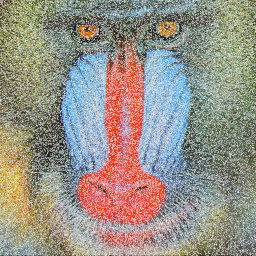

**Task**: Load the noisy baboon image and filter out the noise using a median blur. Display the noisy and filtered images side-by-side to verify it worked!

In [ ]:
# TODO: Load the noisy baboon image (Use your load_image_rgb function)


# TODO: Filter out the noise using a median blur (Experiment with the kernel size)


# TODO: Display the original and filtered images side-by-side (Use your display_image_pair() function)



#### Task solution

In [ ]:
# TODO: Load the noisy baboon image (Use your load_image_rgb function)
baboon_noisy = load_image_rgb('baboon_noisy.png')

# TODO: Filter out the noise using a median blur (Experiment with the kernel size)
baboon_filtered = cv2.medianBlur(baboon_noisy, 5)

# TODO: Display the original and filtered images side-by-side (Use your display_image_pair() function)
display_image_pair(baboon_noisy, baboon_filtered)

### 2.1.2 Sharpening

We can sharpen an image in the same way we blurred an image, i.e. convolve the image with a specific kernel. This time, to achieve this we will use a very generic *OpenCV* function called [*filter2D()*](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) which takes a custom kernel and convolves it over an image. We will manually define the kernel ourselves, then use *`filter2D()`* to convolve our kernel over an image.

We can work out what weights to assign our kernel by looking up the **Sharpen** kernel from the [Kernel Wikipedia page](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

In the code cell below, we define a 3x3 sharpen kernel and convolve it with the RGB baboon image.

In [ ]:
# Sharpen kernel (weights taken from Wikipedia page)
#  NOTE: This is an example of how we can create a numpy array of 32-bit floating point numbers
#        Notice that to create one, we give the numpy function a list of lists. Where each list
#        represents a row of the kernel.
kernel = np.float32([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0],
])


baboon_sharp = cv2.filter2D(baboon_image_rgb, -1, kernel)
display_image_pair(baboon_image_rgb, baboon_sharp)

Your turn!

Another type of sharpen kernel is defined as:

$$
\begin{equation*}
\begin{bmatrix}
-1 & -1 & -1\\
-1 & 9 & -1\\
-1 & -1 & -1
\end{bmatrix}
\end{equation*}
$$

**Task**: Define the above kernel and convolve it with the RGB baboon image, then display the original and sharpened images side-by-side.

In [ ]:
# TODO: Define the sharpen kernel


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Display the original and sharpened image side-by-side



#### Task solution

In [ ]:
# TODO: Define the sharpen kernel
kernel = np.float32([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1],
])

# TODO: Convolve the kernel with the RGB baboon image
baboon_sharpened = cv2.filter2D(baboon_image_rgb, -1, kernel)

# TODO: Display the original and sharpened image side-by-side
display_image_pair(baboon_image_rgb, baboon_sharpened)

### 2.1.3 Other Custom Kernels

As we saw in the Sharpening section, it is easy for us to manually specify a kernel and convolve it with our image.

Below are a series of tasks to get additional practice with *OpenCV* and to get more exposure to different types of kernels we might want to apply. You should find that in each of these tasks that your solution is very similar -- The main difference will be in how you define your kernel.

All of the custom kernels we get you to implement are described on the [Kernel Wikipedia page](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

After completing this section, you are highly encouraged to perform some experimentation yourself, try out different kernels and see what effects they have! Also try experimenting with both RGB and grayscale!

#### 3x3 Box Blur

In one of the previous sections, we used the *OpenCV* *`blur()`* function to apply an averaging blur to our image. Let's try to implement this using *`filter2D()`*.

**Task**: Define the 3x3 box blur kernel (see the Wikipedia page) and convolve it with the RGB baboon image, then display the original and convolved images side-by-side.

**Hint:** You can divide a whole *numpy* by a value, which will individually divide each element in the *numpy* array by that value.  
For example:
```
my_array = np.float32([1, 1, 1, 1]) / 4
print(my_array)
>>> [0.25, 0.25, 0.25, 0.25]
```

In [ ]:
# TODO: Define the 3x3 box blur kernel


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Display the original and convolved images side-by-side



#### Task solution

In [ ]:
kernel = np.float32([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
]) / 9

baboon_blur = cv2.filter2D(baboon_image_rgb, -1, kernel)

display_image_pair(baboon_image_rgb, baboon_blur)

#### 3x3 Gaussian Blur

In one of the previous sections, we used the *OpenCV* function to apply a Gaussian blur to our image. Let's try to implement this using *`filter2D()`*.

**Task**: Define the 3x3 Gaussian blur kernel (see the Wikipedia page) and convolve it with the RGB baboon image, then display the original and convolved images side-by-side.

In [ ]:
# TODO: Define the 3x3 Gaussian blur kernel


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Display the original and convolved images side-by-side



#### Task solution

In [ ]:
kernel = np.float32([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
]) / 16

baboon_blur = cv2.filter2D(baboon_image_rgb, -1, kernel)

display_image_pair(baboon_image_rgb, baboon_blur)

#### 5x5 Box Blur

The 5x5 box blur kernel is not listed on the Wikipedia page, however you should be able to work out how to define it based on the 3x3 box blur kernel definition.

**Task**: Define the 5x5 box blur kernel and convolve it with the RGB baboon image, then display the original and convolved images side-by-side.

In [ ]:
# TODO: Define the 5x5 box blur kernel


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Display the original and convolved images side-by-side



#### Task solution

In [ ]:
kernel = np.float32([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
]) / 25

baboon_blur = cv2.filter2D(baboon_image_rgb, -1, kernel)

display_image_pair(baboon_image_rgb, baboon_blur)

#### Edge Detection

**Task**: Define one of the three edge detection kernels listed on the Wikipedia page and convolve it with the RGB baboon image, then display the original and convolved images side-by-side. Repeat this for the grayscale baboon image.

Can you think of why the resulting images are mostly black?

In [ ]:
# TODO: Define one of the 3 edge detection kernels


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Convolve the kernel with the grayscale baboon image


# TODO: Display the original RGB image and convolved RGB image side-by-side


# TODO: Display the original grayscale image and convolved grayscale image side-by-side



#### Task solution

In [ ]:
# First edge detection kernel
# kernel = np.float32([
#     [1, 0, -1],
#     [0, 0, 0],
#     [-1, 0, 1],
# ])

# Second edge detection kernel
kernel = np.float32([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0],
])

# Third edge detection kernel
# kernel = np.float32([
#     [-1, -1, -1],
#     [-1, 8, -1],
#     [-1, -1, -1],
# ])

baboon_rgb_edges = cv2.filter2D(baboon_image_rgb, -1, kernel)
baboon_gray_edges = cv2.filter2D(baboon_grayscale, -1, kernel)

display_image_pair(baboon_image_rgb, baboon_rgb_edges)
display_image_pair(baboon_grayscale, baboon_gray_edges)

#### Unsharp Masking

**Task**: Define the unsharp masking kernel (see the Wikipedia page) and convolve it with the RGB baboon image, then display the original and convolved images side-by-side. Repeat this for the grayscale baboon image.

In [ ]:
# TODO: Define the unsharp masking kernel


# TODO: Convolve the kernel with the RGB baboon image


# TODO: Convolve the kernel with the grayscale baboon image


# TODO: Display the original RGB image and convolved RGB image side-by-side


# TODO: Display the original grayscale image and convolved grayscale image side-by-side



#### Task solution

In [ ]:
kernel = np.float32([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / -256

baboon_rgb_unsharp = cv2.filter2D(baboon_image_rgb, -1, kernel)
baboon_gray_unsharp = cv2.filter2D(baboon_grayscale, -1, kernel)

display_image_pair(baboon_image_rgb, baboon_rgb_unsharp)
display_image_pair(baboon_grayscale, baboon_gray_unsharp)

### 2.1.4 Comprehension Questions

**Question 1**

What will the resulting image look like if you use a 1x1 kernel in *`blur()`*? Why?

<details>
<summary style='cursor:pointer;'><u>Answer</u></summary>
The output image will look the same. The image looks the same because a 1x1 kernel takes an average over just the one pixel, thus, returning that same pixel.
</details>


**Question 2**

Consider the following three cases for *`GaussianBlur()`*:
  1. A 30x30 kernel and default sigmas
  2. A 7x7 kernel and sigmaX = sigmaY = 1
  3. A 30x30 kernel and sigmaX = sigmaY = 1

Will the resulting image in case 3 be more similar to case 1 or case 2?

<details>
<summary style='cursor:pointer;'><u>Answer</u></summary>
Case 3 will be more similar to case 2, because it uses the same gaussian parameters. With a standard deviation of 1, the edges of a 7x7 kernel will already be very close to 0 (i.e. the edges of the neighbourhood do not contribute much to the result). Then, when you expand this to a 20x20 kernel, the majority of the kernel is so close to zero that the result is almost the same as the 7x7 kernel case.
</details>

## 2.2 Warping

We often find that when we load an image into our code, we first want to transform the shape of the image in some way before we perform any further processing on it.

Common image transformations that we will come across include:
* Resizing/Scaling
* Cropping
* Rotating

In this section, we will look at these 3 main types of transformations.

### 2.2.1 Resizing/Scaling

When we resize/scale an image, we are trying to make the image smaller or larger. It's also common to hear the terms `downscaling` and `upscaling` used.

<details>
<summary style='cursor:pointer;'><u>More Information</u></summary>

When we are reducing the size of an image, we end up with less pixels in our resulting image. This means that some of the pixel information from the original image has been combined to produce a smaller image. There are different strategies we can use to determine what the resulting image should look like.

When we are increasing the size of an image, we end up with more pixels in our resulting image. This means that new pixels need to be generated in our image. This is done with a process called `interpolation`, where to find the value of a new pixel, an `interpolation` method is used to ensure that the new pixel fits in with existing surrounding pixels.

We will see in future labs (particularly when we start looking into Deep Learning), that sometimes it is required that our images are a specific size before we can apply any processing on them. Resizing our images is one way we can achieve this.
</details>

Luckily for us, *OpenCV* has a function to resize images (including downscaling and upscaling), helpfully named [*resize()*](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d).

There are two ways we can interact with the *`resize()`* function, either by specifying the final size we want our image to be, or by specifying the horizontal and vertical scaling factors.

The code below resizes the baboon image to a 250x250px image, using the recommended interpolation method for making an image smaller. Pay attention to the axis tick marks in the *matplotlib* plot to verify that the image has indeed been resized

In [ ]:
baboon_resized = cv2.resize(baboon_image_rgb, dsize=(250, 250), interpolation=cv2.INTER_AREA)
display_image_pair(baboon_image_rgb, baboon_resized)

Your turn!

**Task**: Complete the ***TODOs*** in the following code cell.

In [ ]:
# TODO: Resize the original baboon image to be 1000x1000px and visualize the original and resized images.
#       Use the faster interpolation method that OpenCV recommends (Check the documentation)



# TODO: Resize the original baboon image using 3x horizontal scaling and 2x vertical scaling.
#       Use the OpenCV recommended interpolation method.
#       Visualize the original and resized images.
#       Check the documentation for how to specify scaling factors.
#       HINT: OpenCV requires that you specify dsize. Set it to (0, 0)



# TODO: Resize the original baboon image using 0.25x horizontal scaling and 0.25x vertical scaling.
#       Use the OpenCV recommended interpolation method.
#       Visualize the original and resized images.
#       Check the documentation for how to specify scaling factors.
#       HINT: OpenCV requires that you specify dsize. Set it to (0, 0)



#### Task solution

In [ ]:
# TODO: Resize the original baboon image to be 1000x1000px and visualize the original and resized images.
#       Use the faster interpolation method that OpenCV recommends (Check the documentation)
baboon_resized = cv2.resize(baboon_image_rgb, dsize=(1000, 1000), interpolation=cv2.INTER_LINEAR)
display_image_pair(baboon_image_rgb, baboon_resized)


# TODO: Resize the original baboon image using 3x horizontal scaling and 2x vertical scaling.
#       Use the OpenCV recommended interpolation method.
#       Visualize the original and resized images.
#       Check the documentation for how to specify scaling factors.
#       HINT: OpenCV requires that you specify dsize. Set it to (0, 0)
baboon_resized = cv2.resize(baboon_image_rgb, dsize=(0, 0), fx=3, fy=2, interpolation=cv2.INTER_LINEAR)
display_image_pair(baboon_image_rgb, baboon_resized)


# TODO: Resize the original baboon image using 0.25x horizontal scaling and 0.25x vertical scaling.
#       Use the OpenCV recommended interpolation method.
#       Visualize the original and resized images.
#       Check the documentation for how to specify scaling factors.
#       HINT: OpenCV requires that you specify dsize. Set it to (0, 0)
baboon_resized = cv2.resize(baboon_image_rgb, dsize=(0, 0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
display_image_pair(baboon_image_rgb, baboon_resized)

### 2.2.2 Cropping

Cropping images is the process of extracting a region from the image. It is important to know how to crop images because it is a fundamental operation that is used in many different processes.

It is simple for us to crop images by interacting with the *numpy* array alone. We just can [*slice* our *numpy* array](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp) along the relevant axes/dimension!

Towards the start of the lab, we discussed how our image data is stored inside a multidimensional *numpy* array, with dimensionality H, W, C (H = height, W = width, C = channels). We looked at the shape of our baboon image and saw it was: (512, 512, 3), corresponding to a width and height of 512, and 3 colour channels (RGB).

The code below extracts the region bounded by coordinates (x1, y1) = (50, 25), and (x2, y2) = (250, 275), then displays the original and cropped pair of images side-by-side.

In [ ]:
baboon_rgb_crop = baboon_image_rgb[25:275, 50:250, ...]
print(f'The shape of the cropped image is: {baboon_rgb_crop.shape}')

display_image_pair(baboon_image_rgb, baboon_rgb_crop)

<details>
<summary style='cursor:pointer;'><u>Expand for Discussion</u></summary>

Before moving on, it's worth discussing a few brief details.

When slicing the array, we used the ellipsis notation on the channels dimension. In short, this corresponds to returning all remaining dimensions (no matter how many there are). We do this so it will work for both RGB and grayscale images. We can omit this and get the same result, but it is included for completeness.

You'll notice when slicing our array, we specified the y-coordinates first. This is because our image is stored with dimensionality H, W, C, so our y-axis corresponds to our Height dimension.

You'll also notice that when specifying the region to crop, we specified the top-left and bottom-right coordinates of the region. It is common to give these coordinates the labels (x1, y1) and (x2, y2) respectively.
</details>

Cropping an image is going to be something we do quite frequently. To save us some work in the future, let's create a function to help us out!

**Task**: In the below cell, write a function named *crop_image* that:
* Takes an *image*, an (x1, y1) coordinate tuple (named *top_left*), and an (x2, y2) coordinate tuple (named *bottom_right*) as parameters
* Crops the image based on those coordinates
* Returns the cropped image

Use the code at the bottom of this code cell to test your function. Validate that the displayed result is identical to the one above.

In [ ]:
# TODO: Write your function here



# Test your function!
baboon_rgb_crop = crop_image(baboon_image_rgb, (50, 25), (250, 275))
display_image_pair(baboon_image_rgb, baboon_rgb_crop)

#### Task solution

In [ ]:
def crop_image(image, top_left, bottom_right):
    return image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], ...]

### 2.2.3 Affine transformations

> An affine transformation is a geometric transformation that preserves lines and parallelism (but not necessarily distances and angles)

From: https://en.wikipedia.org/wiki/Affine_transformation

Performing an affine transformation involves creating a matrix and applying it to an image with a matrix multiplication. As we have done previously, we will use *OpenCV* functions to handle these two parts.

An example of an affine transformation is a simple rotation around the image centre. Such a rotation transform matrix takes the form:

$$
\begin{equation*}
M = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
\end{equation*}
$$

Positive angles correspond to a counter-clockwise rotation.

We can use the *OpenCV* function [*getRotationMatrix2D()*](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326) to generate the rotation matrix, *M*. Once we have our rotation matrix, we can then apply it using the *OpenCV* [*warpAffine()*](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) function.

The code below applies a 50 degrees counter-clockwise rotation on the baboon image, then displays the original and rotated images side-by-side.

In [ ]:
# Determine where the image centre is (Needed to get the rotation matrix)
height, width = baboon_image_rgb.shape[:2]
height_centre = height // 2
width_centre = width // 2

# Get the rotation matrix (50 degree rotation around image centre).
# NOTE: OpenCV expects coordinates in form: (x, y).
# NOTE: 1 represents the scaling (we do not want to apply scaling)
M = cv2.getRotationMatrix2D((width_centre, height_centre), 50, 1)

# Apply the rotation matrix (We set the destination image size as the same as the original image)
baboon_rotated = cv2.warpAffine(baboon_image_rgb, M, (width, height))

# Display the image pair
display_image_pair(baboon_image_rgb, baboon_rotated)

<details>
<summary style='cursor:pointer;'><u>Expand for Discussion</u></summary>

You'll notice that we needed to specify the image centre to get the rotation matrix. This is because the *OpenCV* function can perform the rotation anywhere in the image. In general, we will want to rotate the image around the image centre.

You'll notice the output image has parts of the original image cropped out (they are outside the bounds of the rotated image). This is expected. There are ways we can configure the rotation to include the bounds of the image (creating a larger image), however we will not be covering this.

Another very important thing to note. *OpenCV* expects coordinates given as (x, y). It is important that whenever you give an *OpenCV* function coordinates, that you ensure you specify them in this way.
</details>

The code to rotate an image around its centre is a bit involved (computing image centre, getting rotation matrix, applying it). To simplify this, let's create a function to help us out!

**Task**: In the below cell, write a function named *rotate_image* that:
* Takes an *image* and an *angle* as parameters
* Rotates the image by the angle around the image centre
* Returns the rotated image

Use the code at the bottom of this code cell to test your function. Validate that the displayed result is identical to the one above.

In [ ]:
# TODO: Write your function here



# Test your function!
baboon_rgb_rotated = rotate_image(baboon_image_rgb, 50)
display_image_pair(baboon_image_rgb, baboon_rgb_rotated)

#### Task solution

In [ ]:
def rotate_image(image, angle):
    height, width = image.shape[:2]
    M = cv2.getRotationMatrix2D((width // 2, height//2), angle, 1)
    return cv2.warpAffine(image, M, (width, height))

### 2.2.4 Comprehension Questions

**Question 1**

You determine that you need to crop an image and rotate an image. Is the order of these operations important (assuming you use the functions shown above)? Why?

# 3. Challenge Tasks

These tasks are meant to help pull together everything you have covered in this lab or extend on other exercises previously covered. It is highly recommended that you give these tasks a go, but only try to once you've finished the Lab Exercises section.

## Challenge 1 - Image Processing Chain

This task gets you to apply a series of image processing steps to an image.

Where possible, use existing functions you have already written.

Upon successful completion of this task, you should get this image (75x75px):

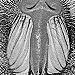

In the following task:
* Load the baboon image (in RGB)
* Resize the image to 125x125
* Rotate the image 180 degrees
* Apply a 3x3 sharpen kernel to the image
* Convert the image to grayscale
* Crop the image with coordinates: (x1, y1) = (25, 25), (x2, y2) = (100, 100)
* Display the original RGB image and your modified image side-by-side
* Save your modified image to file

In [ ]:
# TODO: Write your solution here



## Challenge 2 - Improved Display Image Pair Function

The image displaying function you previously wrote simply takes a pair of images and displays them. Your challenge is to make this function more configurable.

There are no specific constraints for this task, but a few things you can try:
* Be able to set a title
* Be able to disable the axis tick marks
* Be able to configure the figure size

Specifically, you'll want each of these to be a parameter of your function.

Show your demonstrator what you can come up with!

In [ ]:
# TODO: Copy your display_image_pair function here and make some improvements!



# Summary
In this lab, we looked at using some Python packages to perform basic image processing on images. As part of this we saw how to load, filter, warp and display images aswell as seeing how we could write them to disk. This also included discussion on the important concept of how images are represented in our code.